# GENIE Plots
#### Laura Zichi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
def find_unq(df):
    '''Find all unique particles'''
    pdgf = gst_df['pdgf'].to_numpy()
    pdgf_unq = np.unique(np.hstack(pdgf))
    return pdgf_unq

In [62]:
def find_replace_sort(arr, ef, px, py, pz, par, df_new):
    '''From an array, arr, select indices of a given particle, par, and return array of numbers 
    at those indices from different array, sel. If par not in arr return NaN'''
    ser = pd.Series()
    if(np.any(arr == par)):
        index = np.where(arr == par)
        px_arr = np.array(px[index])
        py_arr = np.array(py[index])
        pz_arr = np.array(pz[index])
        fin = np.array(ef[index])
        
        zeros = np.where(np.sqrt(px_arr**2 + py_arr**2) < 1e-6) 


        if(not(np.shape(zeros)[1] == 0)):
            px_arr = np.delete(px_arr, zeros)
            py_arr = np.delete(py_arr, zeros)
            pz_arr = np.delete(pz_arr, zeros)
            fin = np.delete(fin, zeros)
        
        if(not(np.shape(px_arr)[0] == 0)):

            ser['px '+ str(par)] = px_arr[np.argsort(fin)[::-1]]
            ser['py '+ str(par)] = py_arr[np.argsort(fin)[::-1]]
            ser['pz '+ str(par)] = pz_arr[np.argsort(fin)[::-1]]
        
            fin = np.sort(fin)[::-1]
            ser['Ef '+ str(par)] = fin
        else: 
            ser['px '+ str(par)] = np.nan
            ser['py '+ str(par)] = np.nan
            ser['pz '+ str(par)] = np.nan
            ser['Ef '+ str(par)] = np.nan
    else:

        ser['px '+ str(par)] = np.nan
        ser['py '+ str(par)] = np.nan
        ser['pz '+ str(par)] = np.nan
        ser['Ef '+ str(par)] = np.nan
 
    return ser



In [6]:
def extract_nums(df, particles, col):
    '''Make and return new dataframe for a given array of quantities with array of each particle for every event.'''
    df_new = pd.DataFrame()
    
    for par in particles:
        start_time = time.time()
        sers = df.apply(lambda x: find_replace_sort(np.array(x.pdgf), np.array(x[col]), 
                                                       np.array(x.pxf), np.array(x.pyf), np.array(x.pzf), par, df_new), axis=1)
        DF = pd.DataFrame(sers)
        df_new = pd.concat([df_new, DF], axis=1)
        
        print('Done with: ', str(par), 'time took: ', time.time() - start_time, ' still working ...')
    
    return df_new

In [2]:
path = '/Users/laurazichi/Desktop/base_generation_with_weights_9Jun_FSIFix.hdf'
gst_df = pd.read_hdf(path)

In [3]:
lep_df = gst_df[np.sqrt((gst_df['pxl']**2 + gst_df['pyl']**2)) > 0.4]
lep_cut = np.array(lep_df.index)

In [5]:
lep_df.to_hdf("lep_cut_df.hdf", "lep_df")

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2530: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block4_values] [items->['pdgi', 'resc', 'Ei', 'pxi', 'pyi', 'pzi', 'pdgf', 'Ef', 'pxf', 'pyf', 'pzf', 'pf', 'cthf', 'thetaxzf', 'thetayzf', 'thetazf', 'kef', 'accept_n', 'accept_p']]

  pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [32]:
lep_df.describe()

,iev,neu,fspl,tgt,Z,A,hitnuc,hitqrk,resid,neut_code,...,wght_FrInel_pi_p1,wght_FrInel_pi_p2,wght_FrPiProd_pi_n2,wght_FrPiProd_pi_n1,wght_FrPiProd_pi_p1,wght_FrPiProd_pi_p2,wght_FormZone_n2,wght_FormZone_n1,wght_FormZone_p1,wght_FormZone_p2
count,124892.000000,124892.0,124892.0,1.248920e+05,124892.0,124892.0,1.248920e+05,124892.000000,124892.000000,124892.0,...,124892.000000,124892.000000,124892.000000,124892.000000,124892.000000,124892.000000,124892.000000,124892.000000,124892.000000,1.248920e+05
mean,498711.329853,11.0,11.0,1.000220e+09,22.0,48.0,9.004788e+07,0.530202,-69.701846,0.0,...,0.999586,0.999256,0.999581,0.999778,1.000240,1.000365,0.972562,0.990753,1.007584,1.013905e+00
std,289067.801883,0.0,0.0,0.000000e+00,0.0,0.0,4.147100e+08,0.918787,45.802972,0.0,...,0.134354,0.274410,0.167065,0.083151,0.083298,0.160091,1.048025,0.440166,0.250684,5.128838e-01
min,10.000000,11.0,11.0,1.000220e+09,22.0,48.0,2.112000e+03,-3.000000,-99.000000,0.0,...,0.478866,0.205499,0.216000,0.512000,0.173447,-0.200882,0.006899,0.084789,0.001408,5.590765e-07
25%,247179.250000,11.0,11.0,1.000220e+09,22.0,48.0,2.112000e+03,0.000000,-99.000000,0.0,...,0.932085,0.864027,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
50%,498544.500000,11.0,11.0,1.000220e+09,22.0,48.0,2.212000e+03,0.000000,-99.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
75%,748652.750000,11.0,11.0,1.000220e+09,22.0,48.0,2.212000e+03,1.000000,0.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
max,999999.000000,11.0,11.0,1.000220e+09,22.0,48.0,2.000000e+09,3.000000,16.000000,0.0,...,3.567723,9.000802,4.621150,2.480582,1.728000,2.744000,182.752331,60.128154,7.603655,2.618244e+01


In [20]:
pdgf_unq = find_unq(df)

In [96]:
# protons, neutrons, pions, maybe potons
pars = np.array([2212, 2112])
pars_full = np.array([-321, -311, -211,  -13,  -11,   11,   13,   22,  111,  211,  311,  321, 2112, 2212,
 3112, 3122, 3212,3222])
df_out = extract_nums(lep_df, pars_full, 'Ef')

Done with:  -321 time took:  357.252051115036  still working ...
Done with:  -311 time took:  305.4051389694214  still working ...
Done with:  -211 time took:  314.13692903518677  still working ...
Done with:  -13 time took:  309.4470591545105  still working ...
Done with:  -11 time took:  302.63026213645935  still working ...
Done with:  11 time took:  303.69564986228943  still working ...
Done with:  13 time took:  302.9928319454193  still working ...
Done with:  22 time took:  304.00349712371826  still working ...
Done with:  111 time took:  312.405250787735  still working ...
Done with:  211 time took:  311.768990278244  still working ...
Done with:  311 time took:  383.61453199386597  still working ...
Done with:  321 time took:  314.8156270980835  still working ...
Done with:  2112 time took:  331.34959506988525  still working ...
Done with:  2212 time took:  339.0106728076935  still working ...
Done with:  3112 time took:  359.0287890434265  still working ...
Done with:  3122 ti

In [104]:
#df_out.to_pickle('Lep_full_nz.pkl')

In [2]:
df_lep = pd.read_pickle('Lep_full_nz.pkl')
lep_df = pd.read_hdf("lep_cut_df.hdf")

## Plots

### Pt

In [3]:
def extract_num(arr, index):
    if(isinstance(arr, np.ndarray)):
        return arr[index]
    else: 
        return np.nan

In [ ]:
# plus: 0.139570
# minus: 0.139570
# zero: 0.13497

In [42]:
def plot_pt(leading, thresh, subs, Bins, num, wght, sigma, norm = False):
    '''Plot Pt for all particles in leading array. Plot Pt for KE above and below threshold energy of 0.06 GeV for all 
    particles in thresh array. Num is the number of plots.'''
    arr_plot = []
    labels = []
    
    for par in leading:
        arr = df_lep.apply(lambda x: np.sqrt(extract_num(x['px ' + str(par)], 0)**2 + extract_num(x['py ' + str(par)], 0)**2), axis = 1)
        arr_plot.append(arr)
        labels.append('Leading '+str(par)+' $p_t$')
        
    # KE cut above and below 0.06 Gev
    for par, sub, in zip (thresh, subs):
        arr_grt = df_lep.apply(lambda x: np.sqrt(extract_num(x['px ' + str(par)], 0)**2 + extract_num(x['py ' + str(par)], 0)**2) if extract_num(x['Ef ' + str(par)], 0) - sub > 0.06 else np.nan, axis = 1)
        arr_less = df_lep.apply(lambda x: np.sqrt(extract_num(x['px ' + str(par)], 0)**2 + extract_num(x['py ' + str(par)], 0)**2) if extract_num(x['Ef ' + str(par)], 0) - sub < 0.06 else np.nan, axis = 1)
        arr_plot.append(arr_grt)
        labels.append('Leading '+str(par)+' $p_t$'+' KE > 0.06')
        arr_plot.append(arr_less)
        labels.append('Leading '+str(par)+' $p_t$'+' KE < 0.06')

    axs = np.arange(1, num + 1, 1)
    fig, (axs) = plt.subplots(num,1, figsize=(13, num * 8))
    
    units = "GeV/c"
    
    for ax, arr, lab, bins in zip (axs, arr_plot, labels, Bins):
        
        xlabel= lab 
        ylabel='Normalized Events / %2.2f %s '%(bins[-1]-bins[-2],units) 

        ax.hist(arr, weights=lep_df["wght"], color='red', bins = bins, label="CV", histtype = 'step', density = norm)
        ax.hist(arr, weights=lep_df["wght_%s_p%d"%(wght,sigma)], color='blue', bins = bins,
            label="%s +%d$\sigma$"%(wght,sigma), histtype = 'step', density = norm)
        ax.hist(arr, weights=lep_df["wght_%s_n%d"%(wght,sigma)], color='green', bins = bins,
            label="%s -%d$\sigma$"%(wght,sigma), histtype = 'step', density = norm)
        ax.legend(fontsize = 18)
    
        ax.set_xlabel(xlabel, fontsize = 18)
        ax.set_ylabel(ylabel, fontsize = 18)
        

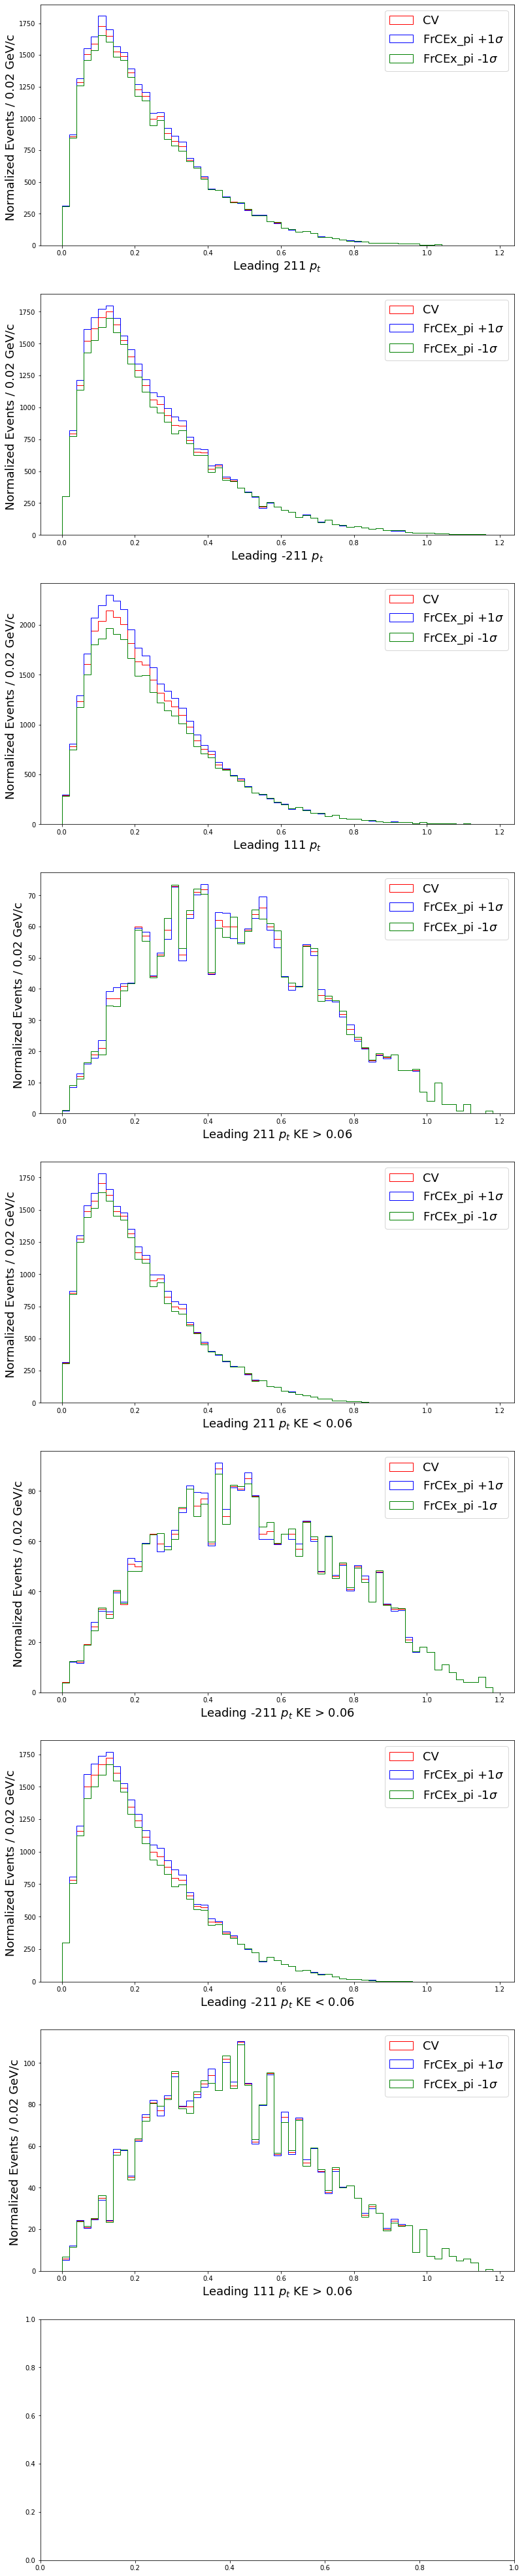

In [39]:
Bins = np.array([np.arange(0, 1.2, 0.02), np.arange(0, 1.2, 0.02), np.arange(0, 1.2, 0.02), np.arange(0, 1.2, 0.02), np.arange(0, 1.2, 0.02)
                , np.arange(0, 1.2, 0.02), np.arange(0, 1.2, 0.02), np.arange(0, 1.2, 0.02)])
Subs = np.array([])
plot_pt(np.array([211, -211, 111]), np.array([211, -211, 111]), Bins, 9, "FrCEx_pi", 1)

In [10]:
# Pt leading proton and neutron
arr_neu = df_lep.apply(lambda x: np.sqrt(extract_num(x['px 2112'], 0)**2 + extract_num(x['py 2112'], 0)**2), axis = 1)
arr_pro = df_lep.apply(lambda x: np.sqrt(extract_num(x['px 2212'], 0)**2 + extract_num(x['py 2212'], 0)**2), axis = 1)

In [23]:
# Pt leading proton and neutron KE cut above, 0.06 GeV
arr_neu_cut = df_lep.apply(lambda x: np.sqrt(extract_num(x['px 2112'], 0)**2 + extract_num(x['py 2112'], 0)**2) if extract_num(x['Ef 2112'], 0) - 0.938 > 0.06 else np.nan, axis = 1)
arr_pro_cut = df_lep.apply(lambda x: np.sqrt(extract_num(x['px 2212'], 0)**2 + extract_num(x['py 2212'], 0)**2) if extract_num(x['Ef 2212'], 0) - 0.938 > 0.06 else np.nan, axis = 1)

In [12]:
# Pt leading proton and neutron KE cut below, 0.06 GeV
arr_neu_less = df_lep.apply(lambda x: np.sqrt(extract_num(x['px 2112'], 0)**2 + extract_num(x['py 2112'], 0)**2) if extract_num(x['Ef 2112'], 0) - 0.938 < 0.06 else np.nan, axis = 1)
arr_pro_less = df_lep.apply(lambda x: np.sqrt(extract_num(x['px 2212'], 0)**2 + extract_num(x['py 2212'], 0)**2) if extract_num(x['Ef 2212'], 0) - 0.938 < 0.06 else np.nan, axis = 1)

In [13]:
# Ef leading proton and neutron KE cut below, 0.06 GeV
arr_neu_l = df_lep.apply(lambda x: extract_num(x['Ef 2112']-0.938, 0) if extract_num(x['Ef 2112'], 0) - 0.938 > 0.06 else np.nan, axis = 1)
arr_pro_l = df_lep.apply(lambda x: extract_num(x['Ef 2212']-0.938, 0) if extract_num(x['Ef 2212'], 0) - 0.938 > 0.06 else np.nan, axis = 1)

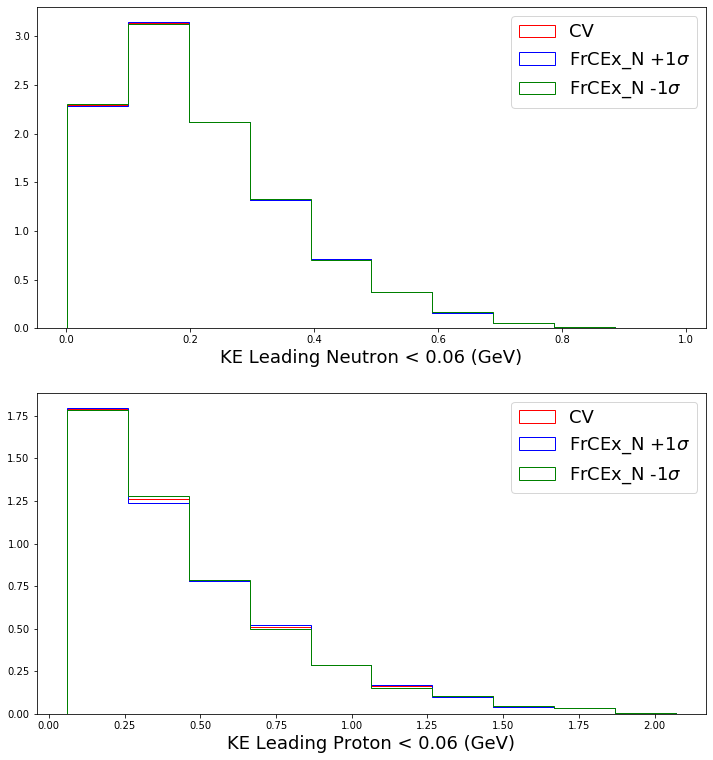

In [38]:
## CHECK CUT OFF CODE ##
sigma = 1 
wght = "FrCEx_N"
units = 'GeV/c'
arrs = np.array([arr_neu_l, arr_neu_l])
labels = np.array(['KE Leading Neutron < 0.06', 'KE Leading Proton < 0.06'])


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,13))
axs = [ax1, ax2]

for ax, arr, lab in zip (axs, arrs, labels):
    xlabel= lab + ' (GeV)'
    #ylabel='Normalized Events / %2.2f %s '%(bins[-1]-bins[-2],units) 

    ax.hist(arr, weights=lep_df["wght"], color='red', label="CV", histtype = 'step', density = True)
    ax.hist(arr, weights=lep_df["wght_%s_p%d"%(wght,sigma)], color='blue', 
            label="%s +%d$\sigma$"%(wght,sigma), histtype = 'step', density = True)
    ax.hist(arr, weights=lep_df["wght_%s_n%d"%(wght,sigma)], color='green', 
            label="%s -%d$\sigma$"%(wght,sigma), histtype = 'step', density = True)
    ax.legend(fontsize = 18)
    
    ax.set_xlabel(xlabel, fontsize = 18)
    #ax.set_ylabel(ylabel, fontsize = 18)

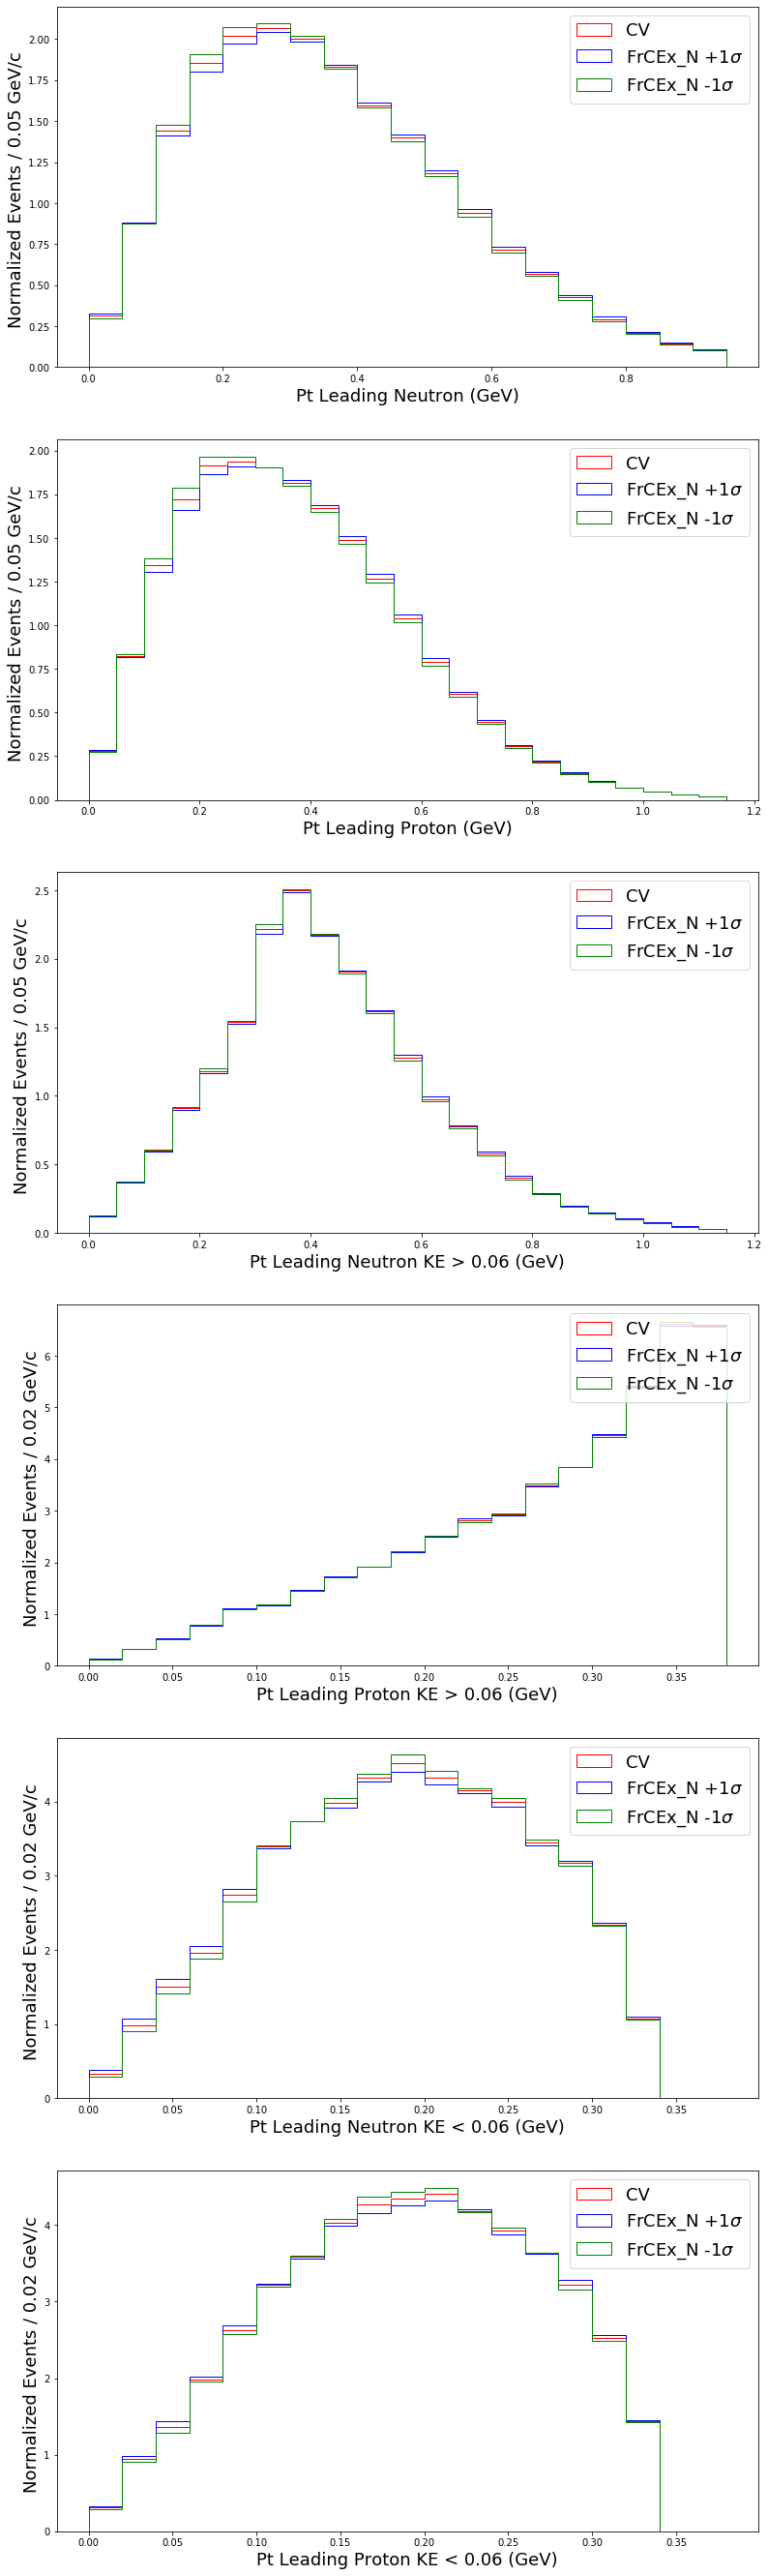

In [24]:
Bins = np.array([np.arange(0,1,0.05), np.arange(0,1.2,0.05), np.arange(0,1.2,0.05),
                 np.arange(0,0.4,0.02), np.arange(0,0.4,0.02), np.arange(0,0.4,0.02)])
sigma = 1 
wght = "FrCEx_N"
units = 'GeV/c'
arrs = np.array([arr_neu, arr_pro, arr_neu_cut, arr_pro_cut, arr_neu_less, arr_pro_less])
labels = np.array(['Pt Leading Neutron', 'Pt Leading Proton', 'Pt Leading Neutron KE > 0.06', 'Pt Leading Proton KE > 0.06',
                 'Pt Leading Neutron KE < 0.06', 'Pt Leading Proton KE < 0.06'])


fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,1, figsize=(13,48))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

for ax, arr, lab, bins in zip (axs, arrs, labels, Bins):
    xlabel= lab + ' (GeV)'
    ylabel='Normalized Events / %2.2f %s '%(bins[-1]-bins[-2],units) 

    ax.hist(arr, weights=lep_df["wght"], color='red', label="CV", bins=bins, histtype = 'step', density = True)
    ax.hist(arr, weights=lep_df["wght_%s_p%d"%(wght,sigma)], color='blue', 
            label="%s +%d$\sigma$"%(wght,sigma), bins=bins, histtype = 'step', density = True)
    ax.hist(arr, weights=lep_df["wght_%s_n%d"%(wght,sigma)], color='green', 
            label="%s -%d$\sigma$"%(wght,sigma), bins=bins, histtype = 'step', density = True)
    ax.legend(fontsize = 18)
    
    ax.set_xlabel(xlabel, fontsize = 18)
    ax.set_ylabel(ylabel, fontsize = 18)

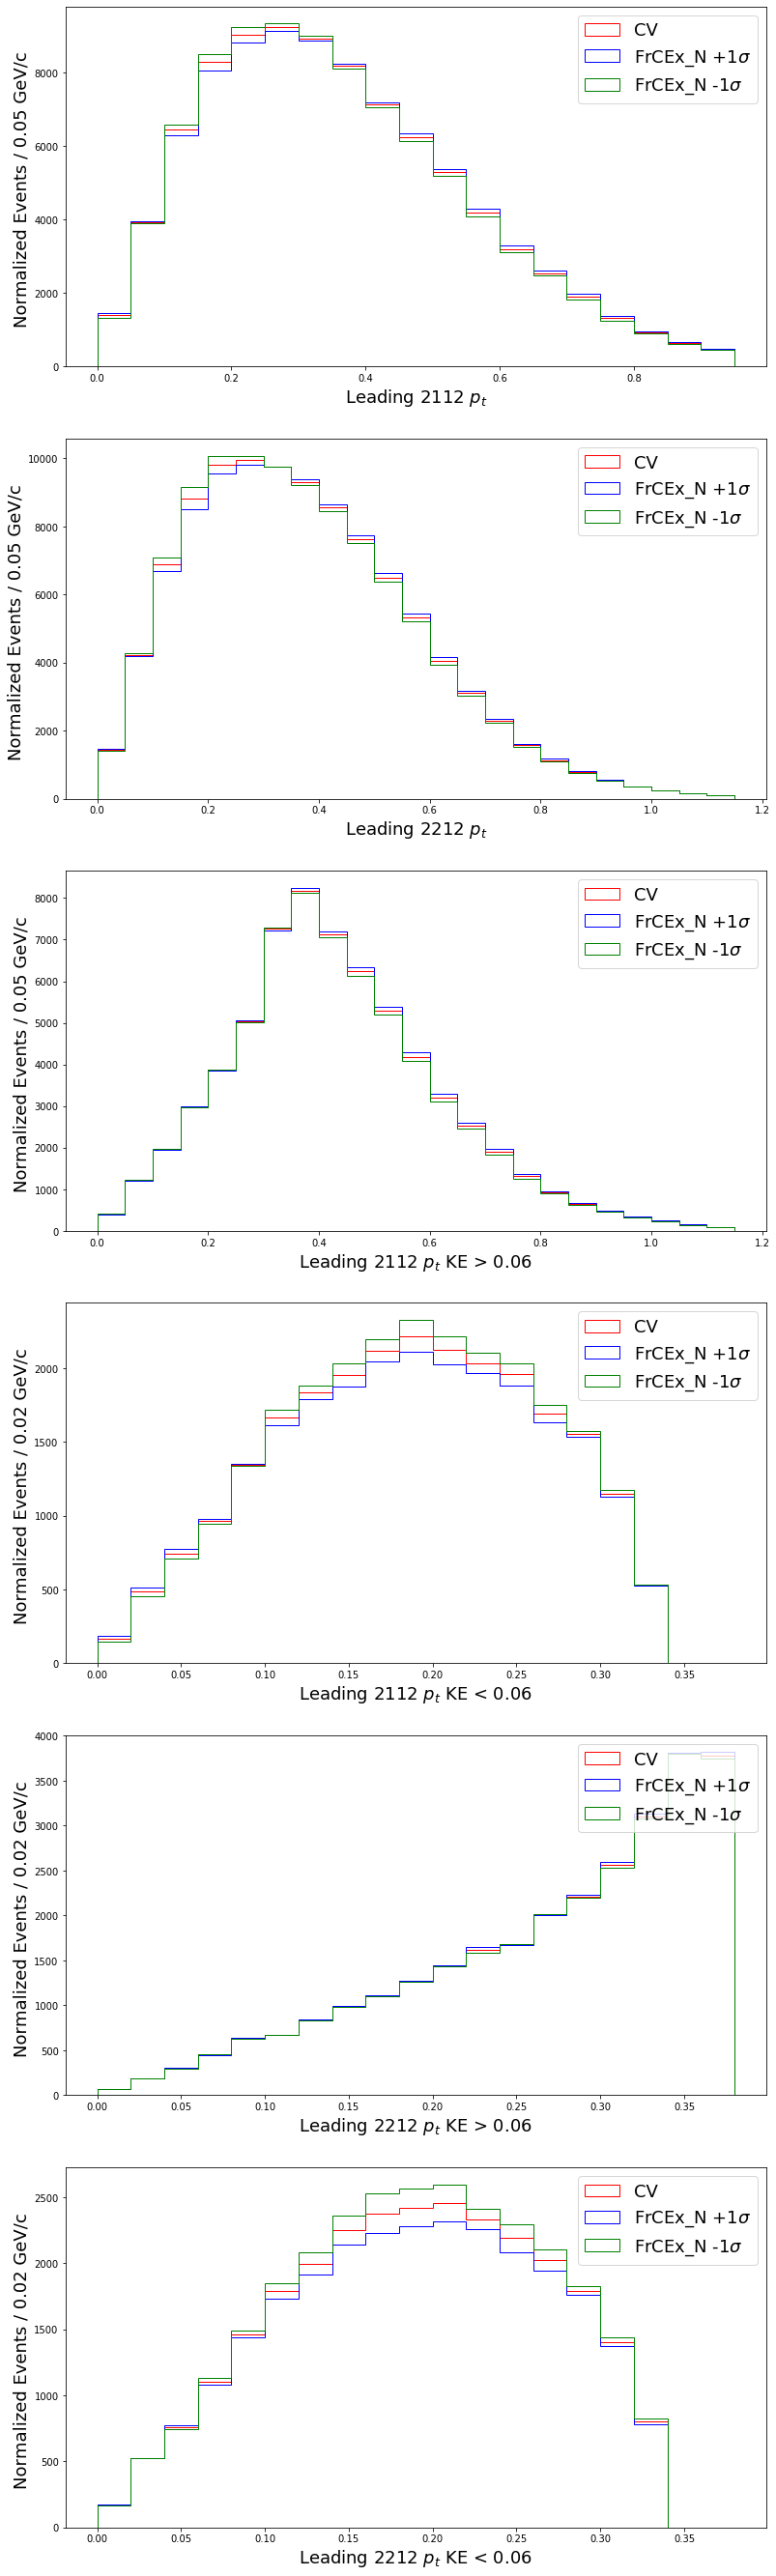

In [44]:
Bins = np.array([np.arange(0,1,0.05), np.arange(0,1.2,0.05), np.arange(0,1.2,0.05),
                 np.arange(0,0.4,0.02), np.arange(0,0.4,0.02), np.arange(0,0.4,0.02)])
Subs = np.array([0.938, 0.938])
plot_pt(np.array([2112, 2212]), np.array([2112, 2212]), Subs, Bins, 6, "FrCEx_N", 1)

### Kinetic Energy

In [46]:
def sum_pars(x, pars, subs):
    num_sum = 0
    for par, sub in zip(pars, subs):
        num_sum = num_sum + np.sum(np.nan_to_num(x['Ef ' + str(par)]-sub))
    return num_sum

In [47]:
def plot_KE(leading, sub_led, sums, subtract, num, Bins, wght, sigma, calc, plot, arr_plot = [], labels = [], norm = False):
    '''Plot KE for all particles in leading array. Plot Pt for KE above and below threshold energy of 0.06 GeV for all 
    particles in thresh array. Num is the number of plots.'''
    if calc:
        arr_plot = []
        labels = []
    
        for par, subsl in zip (leading, sub_led):
            arr = df_lep.apply(lambda x: extract_num(x['Ef ' + str(par)], 0)-subsl, axis = 1)
            arr_plot.append(arr)
            labels.append('Leading '+str(par)+' KE/Energy, GeV')
        
        # KE cut above and below 0.06 Gev
        for pars, subs in zip (sums, subtract):
            arr = df_lep.apply(lambda x: sum_pars(x, pars, subs), axis = 1)
            
            arr = np.where(arr.to_numpy() != 0, arr.to_numpy(), np.nan)
            arr_plot.append(arr)
            labels.append('KE/Energy Sum of '+ str(pars) + ' GeV')                        
    
    if plot:
        axs = np.arange(1, num + 1, 1)
        fig, (axs) = plt.subplots(num,1, figsize=(12, num * 6))
        units = "GeV/c"

        for ax, arr, lab, bins in zip (axs, arr_plot, labels, Bins):
        
            xlabel= lab 
            ylabel='Normalized Events / %2.2f %s '%(bins[-1]-bins[-2],units) 

            ax.hist(arr, weights=lep_df["wght"], color='red', bins = bins, label="CV", histtype = 'step', density = norm)
            ax.hist(arr, weights=lep_df["wght_%s_p%d"%(wght,sigma)], color='blue', bins = bins, 
                label="%s +%d$\sigma$"%(wght,sigma), histtype = 'step', density = norm)
            ax.hist(arr, weights=lep_df["wght_%s_n%d"%(wght,sigma)], color='green', bins = bins, 
                label="%s -%d$\sigma$"%(wght,sigma), histtype = 'step', density = norm)
            ax.legend(fontsize = 18)
    
            ax.set_xlabel(xlabel, fontsize = 18)
            ax.set_ylabel(ylabel, fontsize = 18)
            
    return arr_plot, labels
        

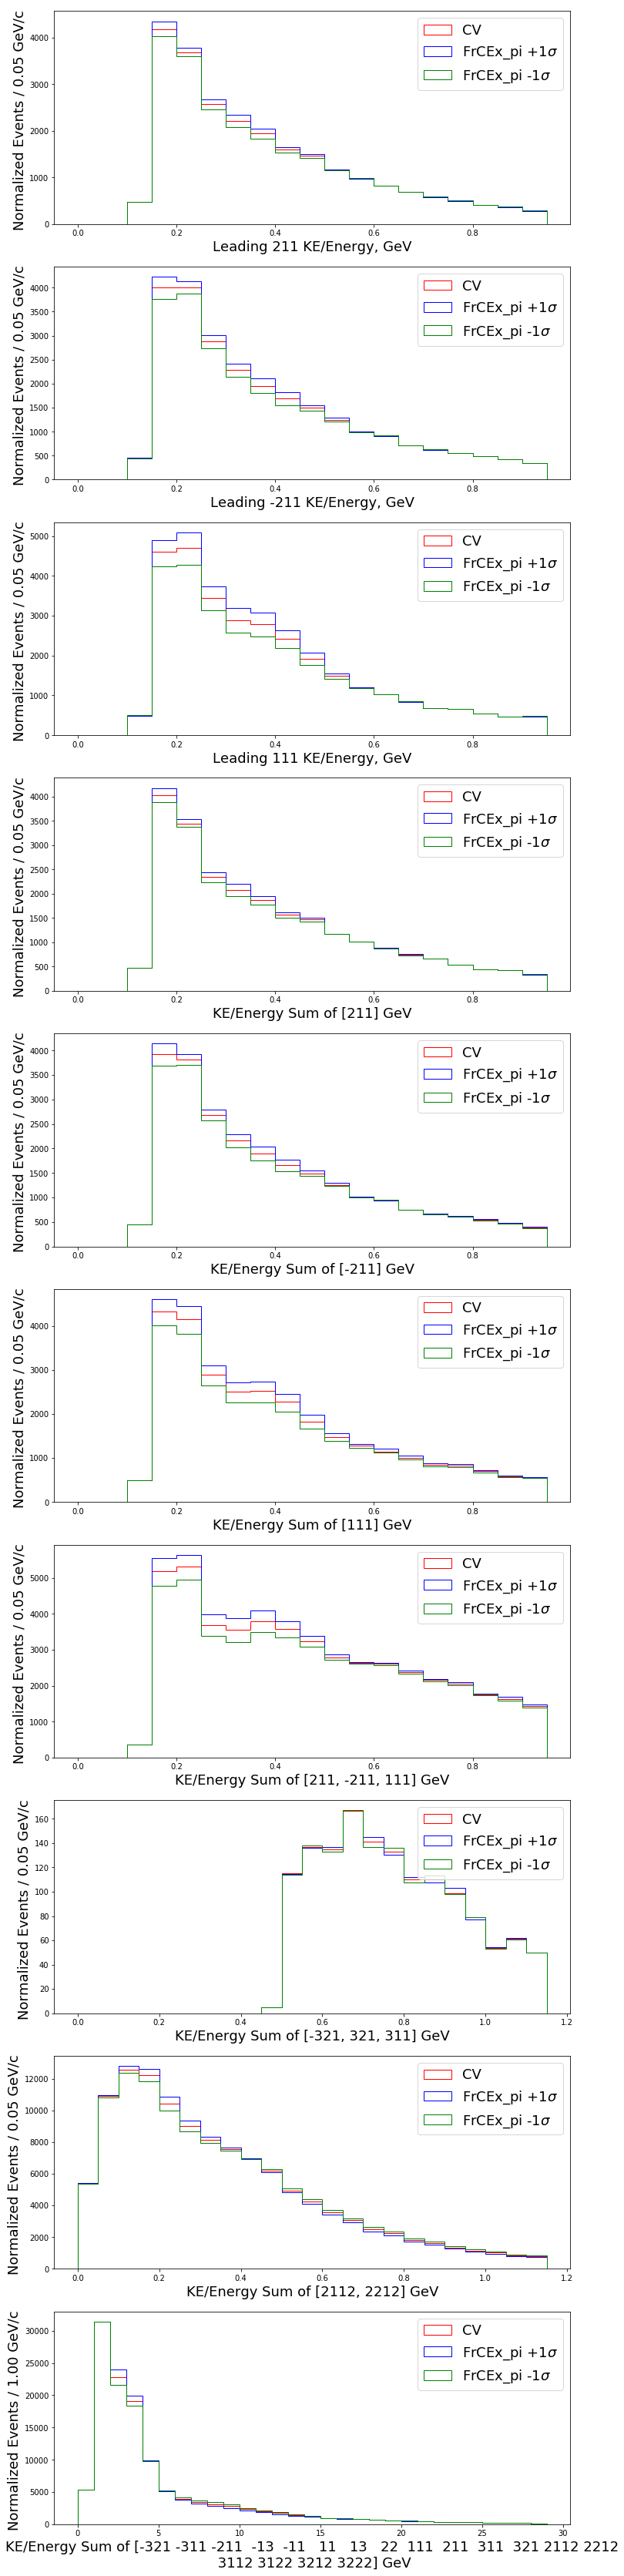

In [48]:
Bins = np.array([np.arange(0,1,0.05), np.arange(0,1,0.05), np.arange(0,1,0.05), np.arange(0,1,0.05),
                np.arange(0,1,0.05), np.arange(0,1,0.05), np.arange(0,1,0.05), np.arange(0,1.2,0.05), 
                 np.arange(0,1.2,0.05), np.arange(0, 30, 1)])

pars_all = np.array([-321, -311, -211,  -13,  -11,   11,   13,   22,  111,  211,  311,  321, 2112, 2212,
 3112, 3122, 3212,3222])
subs = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.938, -0.938, -0.938, -0.938])

KE_leading = np.array([211, -211, 111])
KE_led_sub = np.array([0, 0, 0])
KE_sum = np.array([[211], [-211], [111], [211, -211, 111], [-321, 321, 311], [2112, 2212], pars_all])
KE_sum_sub = np.array([[0], [0], [0], [0, 0, 0], [0,0,0], [0.938, 0.938], subs])

arr_plots, arr_labels = plot_KE(KE_leading, KE_led_sub, KE_sum, KE_sum_sub, 10, Bins, "FrCEx_pi", 1, True, True)

In [160]:
# leading proton or neutron 
# Pt leading proton and neutron
neu_KE = df_lep.apply(lambda x: extract_num(x['Ef 2112'], 0)-0.938, axis = 1)
pro_KE = df_lep.apply(lambda x: extract_num(x['Ef 2212'], 0)-0.938, axis = 1)

In [18]:
# Sum of all protons and neutrons 
arr_sum = df_lep.apply(lambda x: np.sum(np.nan_to_num(x['Ef 2112']-0.938)) + np.sum(np.nan_to_num(x['Ef 2212'])-0.938), axis = 1)
sum_arr = np.where(arr_sum.to_numpy() != 0, arr_sum.to_numpy(), np.nan)

In [179]:
# Pions
pions = df_lep.apply(lambda x: np.sum(np.nan_to_num(x['Ef 211'])) + np.sum(np.nan_to_num(x['Ef -211'])) + np.sum(np.nan_to_num(x['Ef 111'])), axis = 1)
pions_arr = np.where(pions.to_numpy() != 0, pions.to_numpy(), np.nan)

In [225]:
kaons = df_lep.apply(lambda x: np.sum(np.nan_to_num(x['Ef 321'])), axis = 1)
kaons_arr = np.where(pions.to_numpy() != 0, pions.to_numpy(), np.nan)

In [178]:
# pion+
pions_plus = df_lep.apply(lambda x: np.sum(np.nan_to_num(x['Ef 211'])), axis = 1)
pions_plus_arr = np.where(pions_plus.to_numpy() != 0, pions_plus.to_numpy(), np.nan)

In [85]:
# all particles     
def sum_all(x, pars):
    sum_a = 0
    for par in pars:
        if(par == 3112.0 or par == 3122.0 or par == 3212.0 or par == 3222.0):
            sub = 0.938
        else:
            sub = 0
        
        sum_a = sum_a + np.sum(np.nan_to_num(x['Ef ' + str(par)])  - sub)
    return sum_a
        
particles = np.array([-321, -311, -211,  -13,  -11,   11,   13,   22,  111,  211,  311,  321, 2112, 2212,
 3112, 3122, 3212,3222])
all_pars = df_lep.apply(lambda x: sum_all(x, particles), axis = 1)

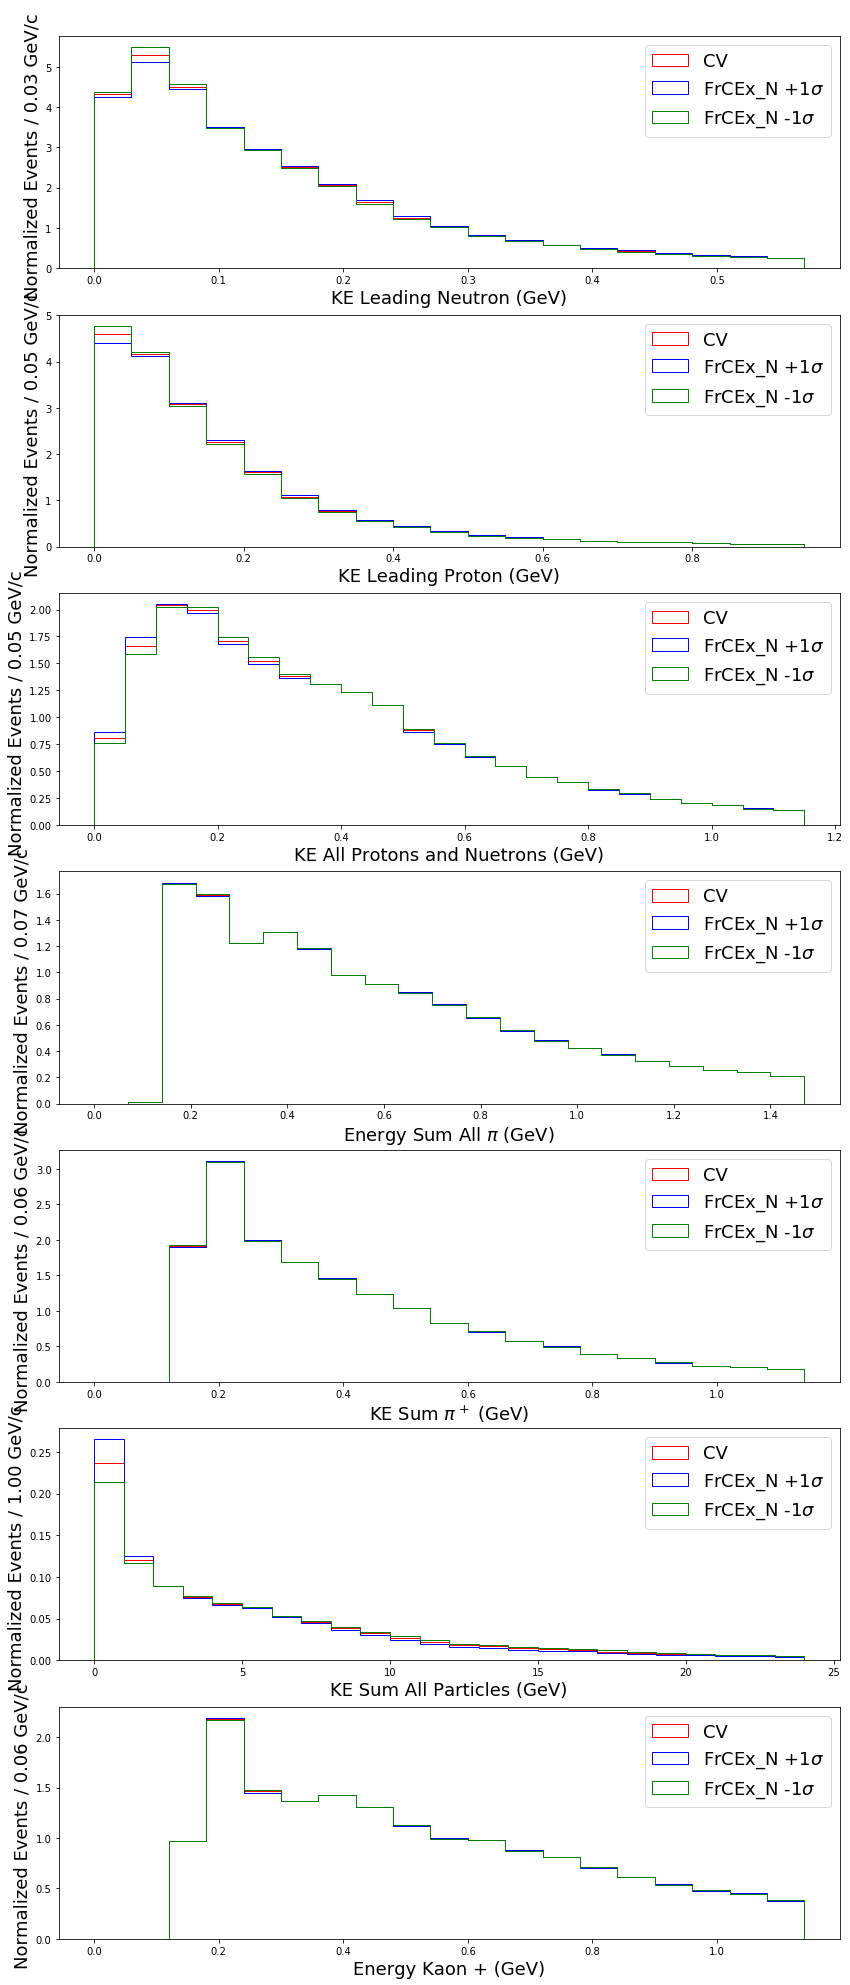

In [227]:
Bins = np.array([np.arange(0,0.6,0.03), np.arange(0,1.0,0.05), np.arange(0,1.2,0.05),
                 np.arange(0,1.5,0.07), np.arange(0,1.2,0.06), np.arange(0,25.0,1), np.arange(0,1.2,0.06)])
sigma = 1 
wght = "FrCEx_N"
units = 'GeV/c'
arrs = np.array([neu_KE, pro_KE, sum_arr, pions_arr, pions_plus_arr, all_pars, kaons_arr])
labels = np.array(['KE Leading Neutron', 'KE Leading Proton', 'KE All Protons and Nuetrons', 'Energy Sum All $\pi$',
                 'KE Sum $\pi^+$', 'KE Sum All Particles', 'Energy Kaon +'])


fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7,1, figsize=(14,35))
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for ax, arr, lab, bins in zip (axs, arrs, labels, Bins):
    xlabel= lab + ' (GeV)'
    ylabel='Normalized Events / %2.2f %s '%(bins[-1]-bins[-2],units) 

    ax.hist(arr, weights=lep_df["wght"], color='red', label="CV", bins=bins, histtype = 'step', density = True)
    ax.hist(arr, weights=lep_df["wght_%s_p%d"%(wght,sigma)], color='blue', 
            label="%s +%d$\sigma$"%(wght,sigma), bins=bins, histtype = 'step', density = True)
    ax.hist(arr, weights=lep_df["wght_%s_n%d"%(wght,sigma)], color='green', 
            label="%s -%d$\sigma$"%(wght,sigma), bins=bins, histtype = 'step', density = True)
    ax.legend(fontsize = 18)
    
    ax.set_xlabel(xlabel, fontsize = 18)
    ax.set_ylabel(ylabel, fontsize = 18)

In [36]:
print(df_lep['Ef 2112'].index)

Int64Index([    10,     18,     24,     29,     32,     40,     59,     62,
                70,     77,
            ...
            999930, 999933, 999934, 999958, 999966, 999967, 999972, 999986,
            999994, 999999],
           dtype='int64', length=124892)


In [42]:
x = 40
print(np.sum(np.nan_to_num(df_lep['Ef 2112'][x]-0.938))+np.sum(np.nan_to_num(df_lep['Ef 2212'][x])-0.938))
print(df_lep['Ef 2112'][x])
print(df_lep['Ef 2212'][x])
print(sum_arr[:10])

0.6178581711573773
nan
[1.37812693 1.05674135 0.99698989]
[0.11472735 0.3096226  1.19878067 0.40163451 0.21891259 0.61785817
 0.09265325 0.84500199 0.31389152 0.73717955]


[0.11472735 0.3096226  1.19878067 0.40163451 0.21891259 0.61785817
 0.09265325 0.84500199 0.31389152 0.73717955]


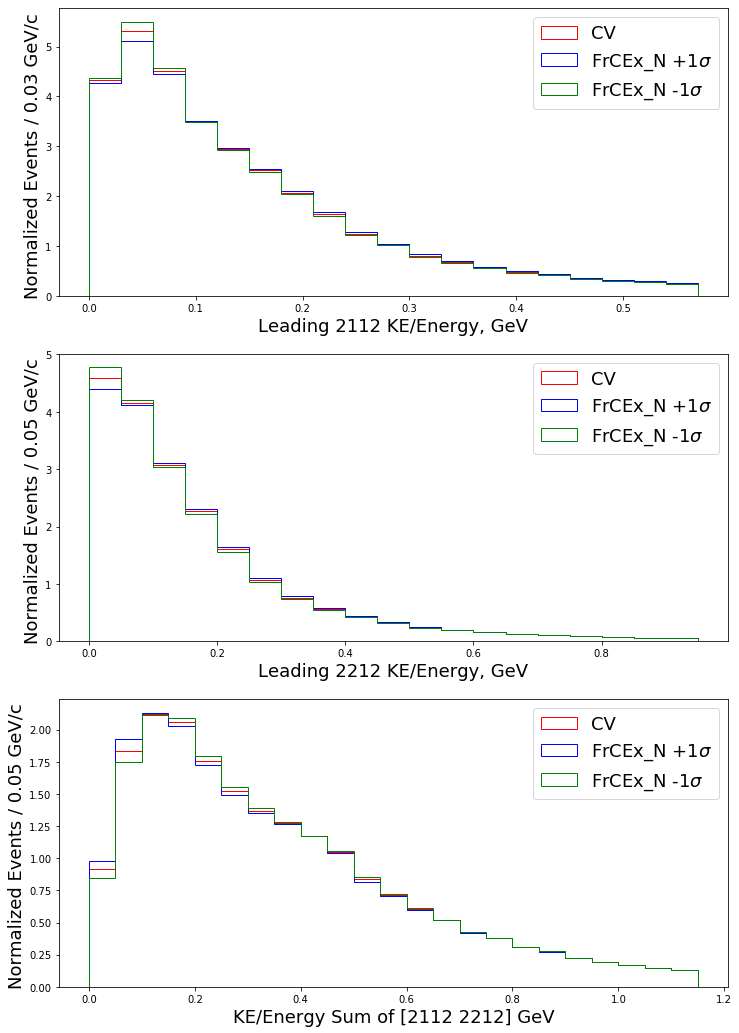

In [44]:
Bins = np.array([np.arange(0,0.6,0.03), np.arange(0,1.0,0.05), np.arange(0,1.2,0.05)])
plot_KE(np.array([2112, 2212]), np.array([0.938, 0.938]), np.array([[2112, 2212]]), np.array([[0.938, 0.938]]), 3, Bins,"FrCEx_N", 1 )

In [ ]:
## lepton angle with respoect cos theta, or arc(cos)
## add in some acceptance terms, angular cuts
## Split things into bins of different lepton kinematics, things as functions of angle, and different lepton pt 

## More Potential Cuts

lepton angle with respoect cos theta, or arc(cos)
add in some acceptance terms, angular cuts
Split things into bins of different lepton kinematics, things as functions of angle, and different lepton pt

In [9]:
## Newly made file
## ASK FOR THE KEYS! ##
df_gst = pd.read_hdf("/Users/laurazichi/Desktop/base_generation_with_weights_13Jun_FSIFix.hdf", "")

ValueError: key must be provided when HDF5 file contains multiple datasets.

In [13]:
lep_df['resc']

10              [2, 1]
18              [1, 3]
24              [1, 7]
29           [4, 1, 1]
32           [3, 2, 3]
              ...     
999967          [1, 3]
999972    [1, 4, 1, 1]
999986       [1, 2, 7]
999994       [1, 1, 1]
999999             [1]
Name: resc, Length: 124892, dtype: object

In [29]:
#thetaxz,thetayz,thetaz
arr = lep_df.columns
arr[70:-1]

Index(['nik0', 'niem', 'niother', 'ni', 'pdgi', 'resc', 'Ei', 'pxi', 'pyi',
       'pzi', 'nf', 'pdgf', 'Ef', 'pxf', 'pyf', 'pzf', 'pf', 'cthf', 'vtxx',
       'vtxy', 'vtxz', 'vtxt', 'sumKEf', 'calresp0', 'ptl', 'thetal',
       'thetaxzf', 'thetayzf', 'thetazf', 'kef', 'accept_n', 'n_n', 'px_n1',
       'py_n1', 'pz_n1', 'E_n1', 'ke_n1', 'thetaz_n1', 'accept_p', 'n_p',
       'px_p1', 'py_p1', 'pz_p1', 'E_p1', 'ke_p1', 'thetaz_p1',
       'wght_FrCEx_N_n2', 'wght_FrCEx_N_n1', 'wght_FrCEx_N_p1',
       'wght_FrCEx_N_p2', 'wght_FrAbs_N_n2', 'wght_FrAbs_N_n1',
       'wght_FrAbs_N_p1', 'wght_FrAbs_N_p2', 'wght_FrInel_N_n2',
       'wght_FrInel_N_n1', 'wght_FrInel_N_p1', 'wght_FrInel_N_p2',
       'wght_FrPiProd_N_n2', 'wght_FrPiProd_N_n1', 'wght_FrPiProd_N_p1',
       'wght_FrPiProd_N_p2', 'wght_FrCEx_pi_n2', 'wght_FrCEx_pi_n1',
       'wght_FrCEx_pi_p1', 'wght_FrCEx_pi_p2', 'wght_FrAbs_pi_n2',
       'wght_FrAbs_pi_n1', 'wght_FrAbs_pi_p1', 'wght_FrAbs_pi_p2',
       'wght_FrInel_pi_n2'